# # Malaria detection using machine learning algorthims

In [1]:
#libaries for reading and preprocessing on dataset 
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv("H:\\cse\\ML project\\csv\\project.csv")
dataset.head()

,labels,area1,area2,area3,area4,area5
0,Parasitized,113.0,15160.0,0.0,0.0,0.0
1,Parasitized,163.5,18954.0,0.0,0.0,0.0
2,Parasitized,85.0,29.5,15201.0,0.0,0.0
3,Parasitized,46.0,196.0,13745.0,0.0,0.0
4,Parasitized,13593.0,0.0,0.0,0.0,0.0


In [3]:
dataset.tail()

,labels,area1,area2,area3,area4,area5
21281,Uninfected,11530.0,0.0,0.0,0.0,0.0
21282,Uninfected,11674.5,0.0,0.0,0.0,0.0
21283,Uninfected,11925.0,0.0,0.0,0.0,0.0
21284,Uninfected,9862.0,0.0,0.0,0.0,0.0
21285,Uninfected,12548.5,0.0,0.0,0.0,0.0


# Preprocessing methods 

In [4]:
A=dataset.dropna(how='all') #remving all the Nan values 
print(A)

            labels    area1    area2    area3  area4  area5
0      Parasitized    113.0  15160.0      0.0    0.0    0.0
1      Parasitized    163.5  18954.0      0.0    0.0    0.0
2      Parasitized     85.0     29.5  15201.0    0.0    0.0
3      Parasitized     46.0    196.0  13745.0    0.0    0.0
4      Parasitized  13593.0      0.0      0.0    0.0    0.0
...            ...      ...      ...      ...    ...    ...
21281   Uninfected  11530.0      0.0      0.0    0.0    0.0
21282   Uninfected  11674.5      0.0      0.0    0.0    0.0
21283   Uninfected  11925.0      0.0      0.0    0.0    0.0
21284   Uninfected   9862.0      0.0      0.0    0.0    0.0
21285   Uninfected  12548.5      0.0      0.0    0.0    0.0

[21285 rows x 6 columns]


In [5]:
A1=A['labels']
print(A1)

0        Parasitized
1        Parasitized
2        Parasitized
3        Parasitized
4        Parasitized
            ...     
21281     Uninfected
21282     Uninfected
21283     Uninfected
21284     Uninfected
21285     Uninfected
Name: labels, Length: 21285, dtype: object


In [6]:
from sklearn.preprocessing import LabelEncoder # apply a label encoder on A 
e=LabelEncoder()
Y=e.fit_transform(A1) #assigns values to Y
print(Y) 

[0 0 0 ... 1 1 1]


In [7]:
X=A.drop(['labels'],axis=1) # assigns values to X
print(X)

         area1    area2    area3  area4  area5
0        113.0  15160.0      0.0    0.0    0.0
1        163.5  18954.0      0.0    0.0    0.0
2         85.0     29.5  15201.0    0.0    0.0
3         46.0    196.0  13745.0    0.0    0.0
4      13593.0      0.0      0.0    0.0    0.0
...        ...      ...      ...    ...    ...
21281  11530.0      0.0      0.0    0.0    0.0
21282  11674.5      0.0      0.0    0.0    0.0
21283  11925.0      0.0      0.0    0.0    0.0
21284   9862.0      0.0      0.0    0.0    0.0
21285  12548.5      0.0      0.0    0.0    0.0

[21285 rows x 5 columns]


In [8]:
from sklearn.decomposition import PCA # for dimensions reduction  
pca = PCA(.85)

In [9]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
X_principal = pca.fit_transform(X)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1','P2','P3']

# spliting the dataset with test data of size 25%

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=10)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(15963, 5)
(5322, 5)
(15963,)
(5322,)


# Applying Different Maching Learning Alogrithms & there Reports 

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=8)
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
from sklearn import metrics
from sklearn.metrics import classification_report
predictions_randomforest = model.predict(X_test)
print(metrics.classification_report(predictions_randomforest,Y_test))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3695
           1       0.89      0.78      0.83      1627

    accuracy                           0.90      5322
   macro avg       0.90      0.87      0.88      5322
weighted avg       0.90      0.90      0.90      5322



In [15]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
from sklearn import metrics
from sklearn.metrics import classification_report
predictions_gaussianNb = model1.predict(X_test)
print(metrics.classification_report(predictions_gaussianNb,Y_test))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      3251
           1       0.92      0.64      0.76      2071

    accuracy                           0.84      5322
   macro avg       0.87      0.80      0.82      5322
weighted avg       0.85      0.84      0.83      5322



In [17]:
import xgboost
model2 = xgboost.XGBClassifier(n_estimators=1000)
model2.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [18]:
from sklearn import metrics
from sklearn.metrics import classification_report
predictions_Xgboost = model2.predict(X_test)
print(metrics.classification_report(predictions_Xgboost,Y_test))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3773
           1       0.84      0.78      0.81      1549

    accuracy                           0.89      5322
   macro avg       0.88      0.86      0.87      5322
weighted avg       0.89      0.89      0.89      5322



In [19]:
from sklearn.neighbors import KNeighborsClassifier
model3= KNeighborsClassifier(n_neighbors=5)
model3.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
from sklearn import metrics
from sklearn.metrics import classification_report
predictions_knn = model3.predict(X_test)
print(metrics.classification_report(predictions_knn,Y_test))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3818
           1       0.82      0.78      0.80      1504

    accuracy                           0.89      5322
   macro avg       0.87      0.85      0.86      5322
weighted avg       0.89      0.89      0.89      5322



In [21]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy', max_depth=None,splitter='best')
model4.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
from sklearn import metrics
from sklearn.metrics import classification_report
predictions_decisiontree = model4.predict(X_test)
print(metrics.classification_report(predictions_decisiontree,Y_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3847
           1       0.79      0.76      0.78      1475

    accuracy                           0.88      5322
   macro avg       0.85      0.84      0.85      5322
weighted avg       0.88      0.88      0.88      5322



In [23]:
from sklearn.linear_model import LogisticRegression
model5=LogisticRegression()
model5.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
from sklearn import metrics
from sklearn.metrics import classification_report
predictions_logistic = model5.predict(X_test)
print(metrics.classification_report(predictions_logistic,Y_test))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3742
           1       0.87      0.79      0.83      1580

    accuracy                           0.90      5322
   macro avg       0.89      0.87      0.88      5322
weighted avg       0.90      0.90      0.90      5322



# Clustering Alogrithms and there Visualisations

C:\Users\vishakha mehta\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


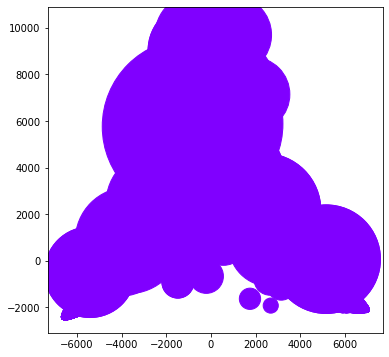

In [25]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
model6=DBSCAN(eps=0.3,min_samples=10)
plt.figure(figsize = (6,6))
plt.scatter(X_principal['P1'], X_principal['P2'],X_principal['P3'],c = model6.fit_predict(X_principal),cmap = 'rainbow')
plt.show()

C:\Users\vishakha mehta\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


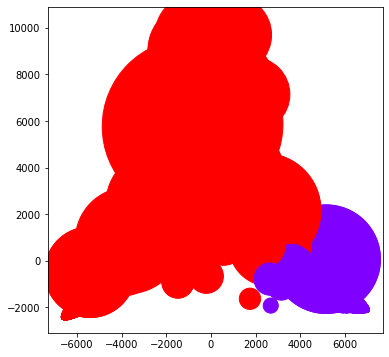

In [28]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
model7=KMeans(n_clusters=2)
plt.figure(figsize = (6,6))
plt.scatter(X_principal['P1'], X_principal['P2'],X_principal['P3'],c = model7.fit_predict(X_principal),cmap = 'rainbow')
plt.show()

#  Analaysis to Predict Best Algorthim

In [26]:
from sklearn.metrics import roc_curve,roc_auc_score
# Instantiate the classfiers and make a list
classifiers = [RandomForestClassifier(n_estimators=100,max_depth=8),
              GaussianNB(),LogisticRegression(),
              xgboost.XGBClassifier(n_estimators=100),
              DecisionTreeClassifier(criterion='entropy', max_depth=None,splitter='best'),
              KNeighborsClassifier(n_neighbors=5)]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    train = cls.fit(X_train, Y_train)
    yproba = train.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(
        Y_test,  yproba)
    auc = roc_auc_score(Y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

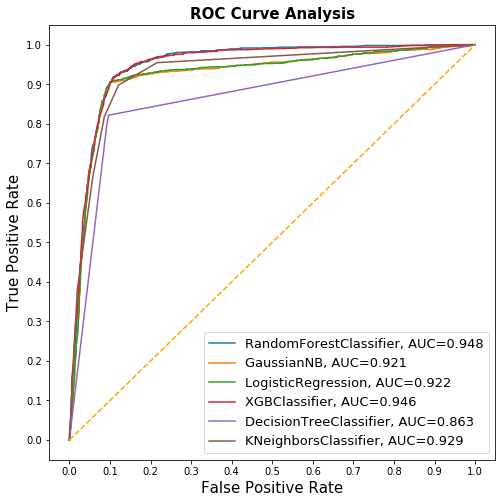

In [29]:
fig = plt.figure(figsize=(8,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()